In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import dataframe
path = r'C:\Users\bruna\Career Foundry\08-2023 Instacart Basket Analysis'
ords_prods_high_act_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_high_act_cust.pkl'))

In [3]:
ords_prods_high_act_cust.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_order,days_since_prior_order,first_order_flag,product_id,add_to_cart_order,reordered,...,nr_dependants,fam_status,income,_merge,region,cust_activity_flag,age_flag,income_flag,fam_demog_flag,department
0,2539329,1,1,2,8,NaN,True,196,1,0,...,3,married,40423,both,South,High activity customer,Young,Low income,Young family,Beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,...,3,married,40423,both,South,High activity customer,Young,Low income,Young family,Beverages
2,473747,1,3,3,12,21.0,False,196,1,1,...,3,married,40423,both,South,High activity customer,Young,Low income,Young family,Beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,...,3,married,40423,both,South,High activity customer,Young,Low income,Young family,Beverages
4,431534,1,5,4,15,28.0,False,196,1,1,...,3,married,40423,both,South,High activity customer,Young,Low income,Young family,Beverages


### Key Question 6: Are there differences in ordering habits based on a customer’s region?


### Key Question 6a: Distribution of order price based on region

Price Label:
- If price is <= 5 then "Low-range product"
- if price is >5 and <=15 then "Mid-range product"
- if price is > 15 then "High-range product""

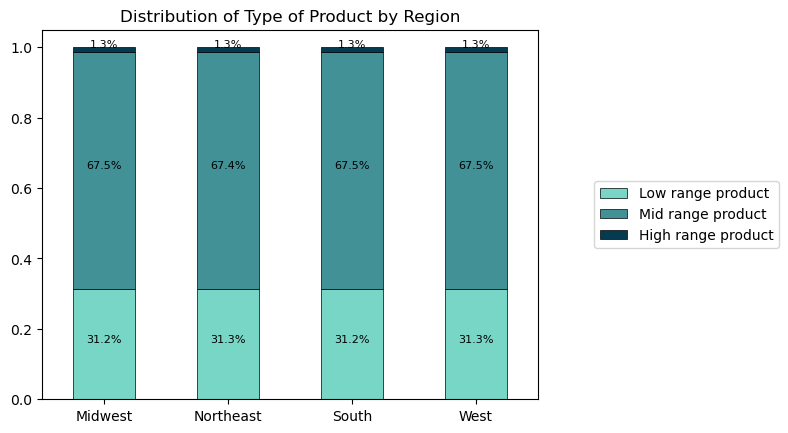

In [36]:
# Group the data by 'price_range' and 'region' and count occurrences
grouped = ords_prods_high_act_cust.groupby(['region', 'price_range_loc']).size().unstack(fill_value=0)

# Reorder the columns to 'Low range product,' 'Mid range product,' 'High range product'
grouped = grouped[['Low range product', 'Mid range product', 'High range product']]

# Normalize the data to sum up to 100% for each group
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

# Create a grouped bar plot
ax = grouped_normalized.plot(kind='bar', 
                             stacked=True, 
                             color=['#78D6C6','#419197','#053B50'],
                             edgecolor='black', linewidth=0.5)

# Set axis labels and title
plt.xlabel(None)
plt.ylabel(None)
plt.title('Distribution of Type of Product by Region')

# Rotate the label to horizontal
ax.set_xticklabels(grouped_normalized.index, rotation=0)

# Add labels for each bar segment
for bar in ax.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    label = f'{height:.1%}'
    va = 'top' if 'High range product' in label else 'bottom' #adjusts the position of label so it's legible
    ax.annotate(label, (x + width/2, y + height/2), ha='center', va=va, fontsize=8)

# Adjust the position of the legend
plt.legend(loc = 'center right',
          bbox_to_anchor=(1, 0, 0.5, 1)) #sets position of legend box in relation to chart

# Export the plot
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bargrouped_region_price.png'))

### Key Question 6b: Distribution of prices by day of week based on region

30964564 30964564


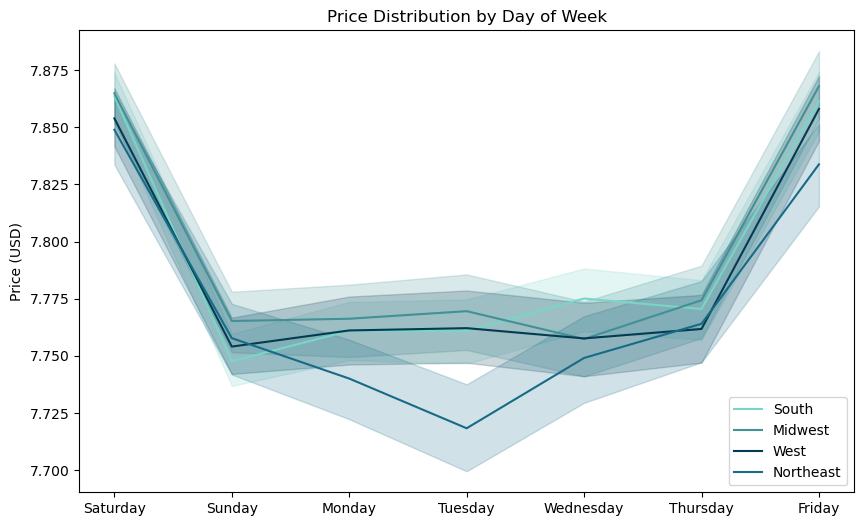

In [22]:
# Create a list holding True/False values to the test np.random.rant()<= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_high_act_cust)) <= 0.7

# Store 70% of the sample in the dataframe big and 30% in dataframe small
big = ords_prods_high_act_cust[dev]
small = ords_prods_high_act_cust[~dev]

# Double check length of original dataframe vs both samples together
print(len(ords_prods_high_act_cust), len(big) + len(small))

# Reduce the sample to only the columns needed for the chart (using small sample)
ords_prods_small_dow_region = small[['orders_day_of_week', 'prices', 'region']]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

# Create a dictionary to map index labels to the desired day names
day_names = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
}

# Define colors for each line
colors = ['#78D6C6', '#419197', '#053B50', '#176B87']

# Iterate over unique values in 'region' to separate lines by region
for i, order_freq in enumerate(ords_prods_small_dow_region['region'].unique()):
    subset = ords_prods_small_dow_region[ords_prods_small_dow_region['region'] == order_freq]
    sns.lineplot(data=subset, x='orders_day_of_week', y='prices', label=order_freq, color=colors[i])

# Set labels and title
ax.set_xlabel(None)
ax.set_ylabel('Price (USD)')
ax.set_title('Price Distribution by Day of Week')

# Update x-axis labels to use day names
ax.set_xticks(list(day_names.keys()))
ax.set_xticklabels(list(day_names.values()), rotation=0)

# Add a legend
ax.legend(loc='lower right')

# Export visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_price_dow_region.png'))

### Key Question 6c: Distribution of prices by hour of day based on region

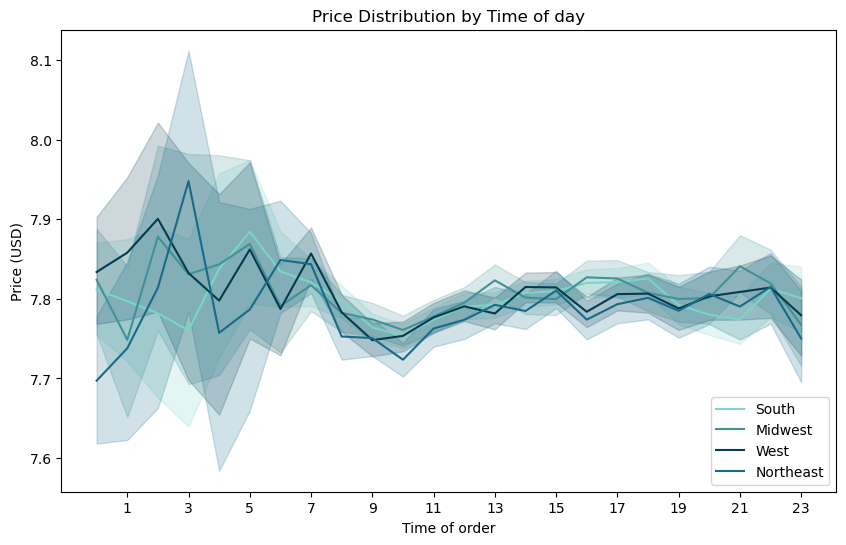

In [38]:
# Reduce the sample to only the columns needed for the chart (using small sample)
ords_prods_small_time_region = small[['time_of_order', 'prices', 'region']]

# Create a line chart with three lines based on 'region'
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each line
colors = ['#78D6C6', '#419197', '#053B50', '#176B87']

# Iterate over unique values in 'region' to separate lines by region
for i, order_freq in enumerate(ords_prods_small_time_region['region'].unique()):
    subset = ords_prods_small_time_region[ords_prods_small_time_region['region'] == order_freq]
    sns.lineplot(data=subset, x='time_of_order', y='prices', label=order_freq, color=colors[i])

# Set labels and title
ax.set_xlabel('Time of order')
ax.set_ylabel('Price (USD)')
ax.set_title('Price Distribution by Time of day')

# Customize x-axis ticks and labels
ax.set_xticks(range(1, 25, 2))  # Start at 1, end at 24, with a step of 2
ax.set_xticklabels([str(i) for i in range(1, 25, 2)])  # Custom labels

# Add a legend
ax.legend(loc='lower right')

# Export visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_price_time_region.png'))


### Key Question 6d: Distribution of nr of orders by day of week based on region

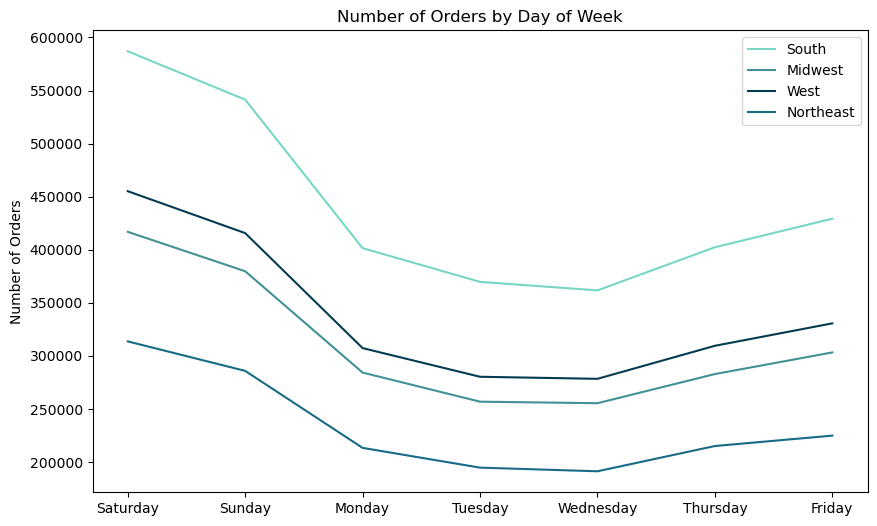

In [39]:
# Create a dictionary to map index labels to the desired day names
day_names = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
}

# Reduce the sample to only the columns needed for the chart (using small sample)
ords_prods_small_dow_region = small[['orders_day_of_week', 'region']]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each line
colors = ['#78D6C6', '#419197', '#053B50', '#176B87']

# Iterate over unique values in 'region' to separate lines by region
for i, order_freq in enumerate(ords_prods_small_dow_region['region'].unique()):
    subset = ords_prods_small_dow_region[ords_prods_small_dow_region['region'] == order_freq]
    
    # Calculate the count of each day for the current loyalty type
    day_counts = subset['orders_day_of_week'].value_counts().sort_index()
    sns.lineplot(data=day_counts, label=order_freq, color=colors[i])

# Set labels and title
ax.set_xlabel(None)
ax.set_ylabel('Number of Orders')
ax.set_title('Number of Orders by Day of Week')

# Update x-axis labels to use day names
ax.set_xticks(list(day_names.keys()))
ax.set_xticklabels(list(day_names.values()), rotation=0)

# Add a legend
ax.legend(loc='upper right')

# Export visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_orders_dow_region.png'))

### Key Question 6e: Distribution of nr of orders by time of day based on region

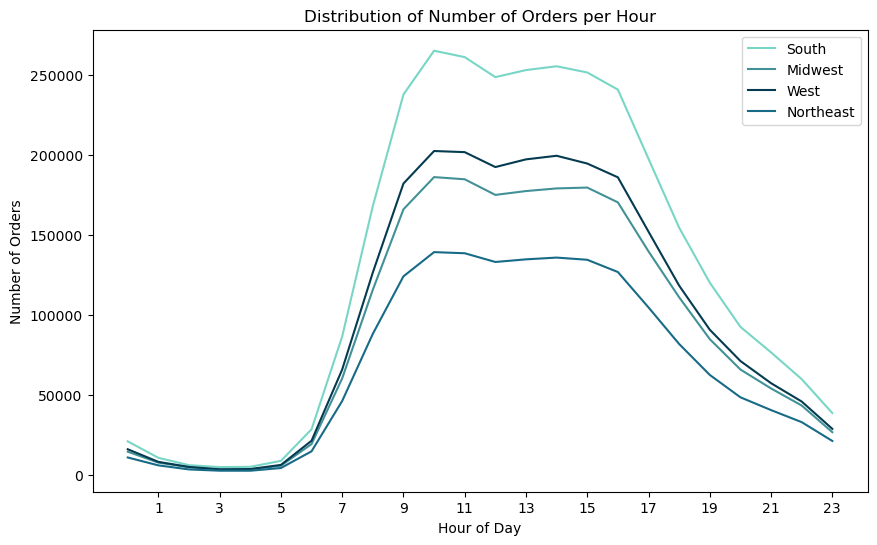

In [40]:
# Reduce the sample to only the columns needed for the chart (using small sample)
ords_prods_small_time_region = small[['time_of_order', 'region']]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each line
colors = ['#78D6C6', '#419197', '#053B50', '#176B87']

# Iterate over unique values in 'region' to separate lines by region
for i, order_freq in enumerate(ords_prods_small_time_region['region'].unique()):
    subset = ords_prods_small_time_region[ords_prods_small_time_region['region'] == order_freq]
    
    # Calculate the count of each day for the current loyalty type
    day_counts = subset['time_of_order'].value_counts().sort_index()
    sns.lineplot(data=day_counts, label=order_freq, color=colors[i])

# Set labels and title
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Orders')
ax.set_title('Distribution of Number of Orders per Hour')


# Customize x-axis ticks and labels
ax.set_xticks(range(1, 25, 2))  # Start at 1, end at 24, with a step of 2
ax.set_xticklabels([str(i) for i in range(1, 25, 2)])  # Custom labels

# Add a legend
ax.legend(loc='upper right')

# Export visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_orders_time_region.png'))

### Key Question 6f: Top departments (count of orders) by region

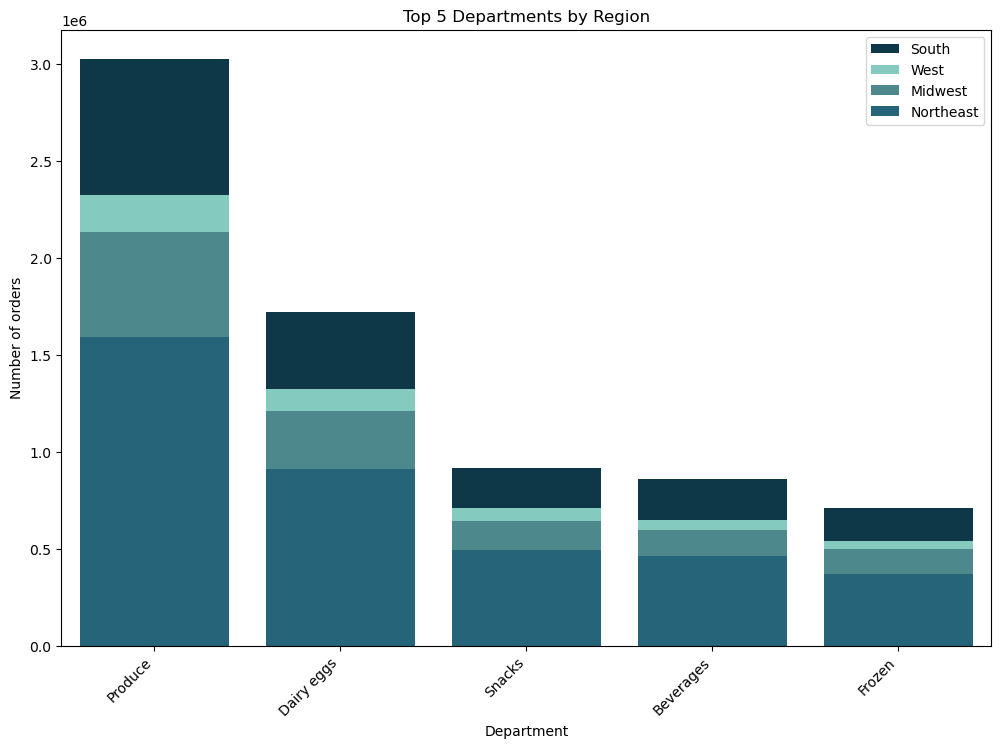

In [36]:
# Filter the data for each region
northeast = ords_prods_high_act_cust[ords_prods_high_act_cust['region'] == 'Northeast']
south = ords_prods_high_act_cust[ords_prods_high_act_cust['region'] == 'South']
midwest = ords_prods_high_act_cust[ords_prods_high_act_cust['region'] == 'Midwest']
west = ords_prods_high_act_cust[ords_prods_high_act_cust['region'] == 'West']

# Calculate the top 5 departments for each customer type
top_departments_south = south['department'].value_counts().nlargest(5)
top_departments_midwest = midwest['department'].value_counts().nlargest(5)
top_departments_west = west['department'].value_counts().nlargest(5)
top_departments_northeast = northeast['department'].value_counts().nlargest(5)

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the top departments for each region
sns.barplot(x=top_departments_south.index, y=top_departments_south.values, ax=ax, color='#053B50', label='South')
sns.barplot(x=top_departments_west.index, y=top_departments_west.values, ax=ax, color='#78D6C6', label='West')
sns.barplot(x=top_departments_midwest.index, y=top_departments_midwest.values, ax=ax, color='#419197', label='Midwest')
sns.barplot(x=top_departments_northeast.index, y=top_departments_northeast.values, ax=ax, color='#176B87', label='Northeast')

# Set labels and title
ax.set_xlabel('Department')
ax.set_ylabel('Number of orders')
ax.set_title('Top 5 Departments by Region')

# Rotate x-axis labels for better readability (optional)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add a legend
ax.legend()

# Export visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_departments_region.png'))

The top 5 departments are the same accross the 4 regions (Produce, Dairy eggs, Snacks, Beverages and Frozen). No differences found in the distribution.


### Key Question 7: Is there a connection between age and family status in terms of ordering habits?

### Key Question 7a: Distribution of average order price per age

Spending Flag:
- If average price per order < 10, 'Low spender'
- If average price per order >= 10, 'High spender'


Age Flag:
- If age <= 35: 'Young'
- If age >35 and <= 65: 'Middle-aged'
- If age >65: 'Senior'

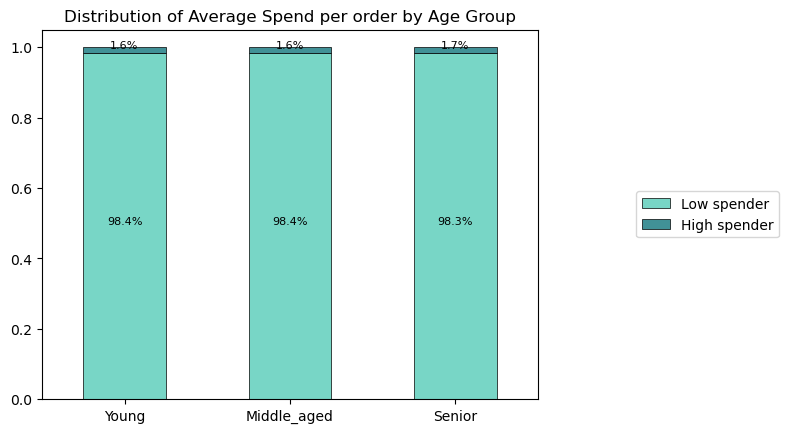

In [14]:
# Group the data by 'spending_flag' and 'age_label' and count occurrences
grouped = ords_prods_high_act_cust.groupby(['age_flag', 'spending_flag']).size().unstack(fill_value=0)

# Reorder the columns in the chart
order = ['Young', 'Middle_aged', 'Senior']
grouped = grouped.loc[order]

# Reorder the slices in the chart
grouped = grouped[['Low spender', 'High spender']]

# Normalize the data to sum up to 100% for each group
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

# Create a grouped bar plot
ax = grouped_normalized.plot(kind='bar', 
                             stacked=True, 
                             color=['#78D6C6','#419197','#053B50'],
                             edgecolor='black', linewidth=0.5)

# Set axis labels and title
plt.xlabel(None)
plt.ylabel(None)
plt.title('Distribution of Average Spend per order by Age Group')

# Rotate the label to horizontal
ax.set_xticklabels(grouped_normalized.index, rotation=0)

# Add labels for each bar segment
for bar in ax.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    label = f'{height:.1%}'
    ax.annotate(label, (x + width/2, y + height/2), ha='center', va=va, fontsize=8)

# Adjust the position of the legend
plt.legend(loc = 'center right',
          bbox_to_anchor=(1, 0, 0.5, 1))

# Export the plot
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bargrouped_age_spendingflag.png'))

### Key Question 7b: Distribution of average order frequency per age

Order Frequency Flag:
- If median of days since previous order >20, 'Non-frequent customer'
- If median of days since previous order > 10 and <= 20, 'Regular customer'
- If median of days since previous order <=10, 'Frequent customer'

Age Flag:
- If age <= 35: 'Young'
- If age >35 and <= 65: 'Middle-aged'
- If age >65: 'Senior'

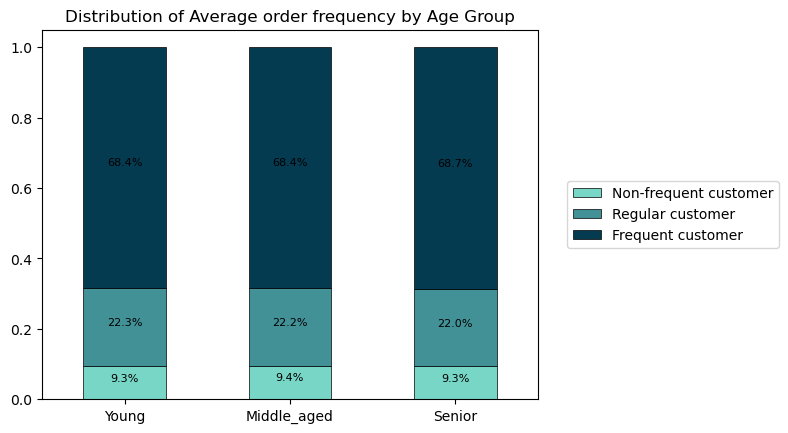

In [22]:
# Group the data by 'order_frequency_flag' and 'age_label' and count occurrences
grouped = ords_prods_high_act_cust.groupby(['age_flag', 'order_frequency_flag']).size().unstack(fill_value=0)

# Reorder the columns in the chart
order = ['Young', 'Middle_aged', 'Senior']
grouped = grouped.loc[order]

# Reorder the slices in the chart
grouped = grouped[['Non-frequent customer', 'Regular customer', 'Frequent customer']]

# Normalize the data to sum up to 100% for each group
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

# Create a grouped bar plot
ax = grouped_normalized.plot(kind='bar', 
                             stacked=True, 
                             color=['#78D6C6','#419197','#053B50'],
                             edgecolor='black', linewidth=0.5)

# Set axis labels and title
plt.xlabel(None)
plt.ylabel(None)
plt.title('Distribution of Average order frequency by Age Group')

# Rotate the label to horizontal
ax.set_xticklabels(grouped_normalized.index, rotation=0)

# Add labels for each bar segment
for bar in ax.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    label = f'{height:.1%}'
    ax.annotate(label, (x + width/2, y + height/2), ha='center', va=va, fontsize=8)
    
# Adjust the position of the legend
plt.legend(loc = 'center right',
          bbox_to_anchor=(1, 0, 0.5, 1))

# Export the plot
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bargrouped_age_orderfrequency.png'))

### Key Question 7c: Distribution of max nr of orders (loyalty) per age

Loyalty Flag:
- If max order number <=10, 'New customer'
- If max order number >10 and <=40, 'Regular customer'
- If max order > 40, 'Loyal customer'

Age Flag:
- If age <= 35: 'Young'
- If age >35 and <= 65: 'Middle-aged'
- If age >65: 'Senior'

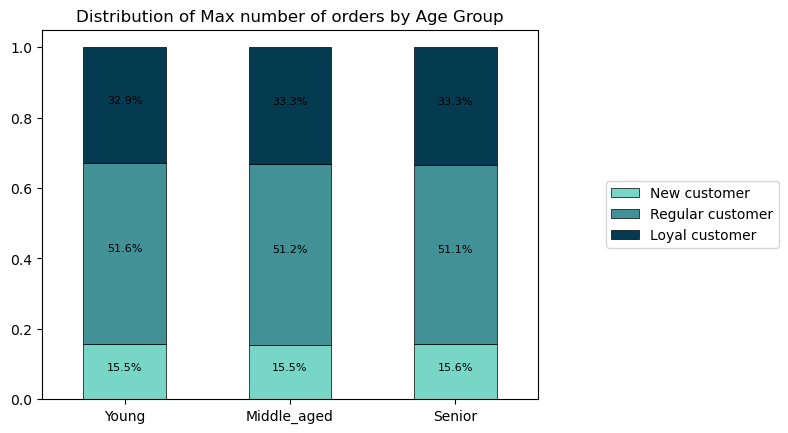

In [34]:
# Group the data by 'loyalty_flag' and 'age_label' and count occurrences
grouped = ords_prods_high_act_cust.groupby(['age_flag', 'loyalty_flag']).size().unstack(fill_value=0)

# Reorder the columns in the chart
order = ['Young', 'Middle_aged', 'Senior']
grouped = grouped.loc[order]

# Reorder the slices in the chart
grouped = grouped[['New customer', 'Regular customer', 'Loyal customer']]

# Normalize the data to sum up to 100% for each group
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

# Create a grouped bar plot
ax = grouped_normalized.plot(kind='bar', 
                             stacked=True, 
                             color=['#78D6C6','#419197','#053B50'],
                             edgecolor='black', linewidth=0.5)

# Set axis labels and title
plt.xlabel(None)
plt.ylabel(None)
plt.title('Distribution of Max number of orders by Age Group')

# Rotate the label to horizontal
ax.set_xticklabels(grouped_normalized.index, rotation=0)

# Add labels for each bar segment
for i, bar in enumerate(ax.patches):
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    label = f'{height:.1%}'
    ax.annotate(label, (x + width/2, y + height/2), ha='center', va=va, fontsize=8)
    
    
# Adjust the position of the legend
plt.legend(loc = 'center right',
          bbox_to_anchor=(1, 0, 0.5, 1))

# Export the plot
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bargrouped_age_loyalty.png'))


### Key Question 7d: Distribution of nr of orders by day of week by Age Group

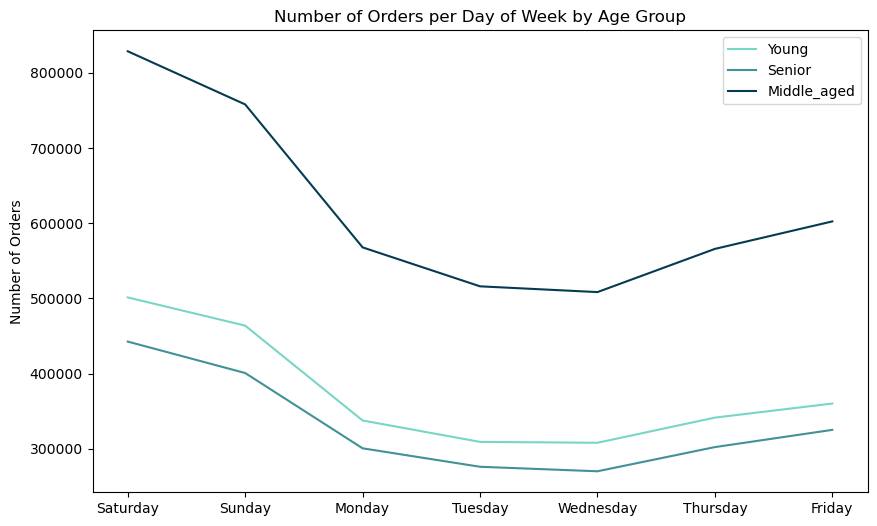

In [52]:
# Reduce the sample to only the columns needed for the chart (using small sample)
ords_prods_small = small[['orders_day_of_week', 'age_flag']]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each line
colors = ['#78D6C6', '#419197', '#053B50', '#176B87']


# Iterate over unique values in to separate lines by group
for i, order_freq in enumerate(ords_prods_small['age_flag'].unique()):
    subset = ords_prods_small[ords_prods_small['age_flag'] == order_freq]
    
    # Calculate the count of each day for the current loyalty type
    day_counts = subset['orders_day_of_week'].value_counts().sort_index()
    sns.lineplot(data=day_counts, label=order_freq, color=colors[i])

# Set labels and title
ax.set_xlabel(None)
ax.set_ylabel('Number of Orders')
ax.set_title('Number of Orders per Day of Week by Age Group')

# Update x-axis labels to use day names
ax.set_xticks(list(day_names.keys()))
ax.set_xticklabels(list(day_names.values()), rotation=0)

# Add a legend
ax.legend(loc='upper right')

# Export visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_orders_dow_age.png'))


### Key Question 7e: Distribution of nr of orders by time of day by Age Group

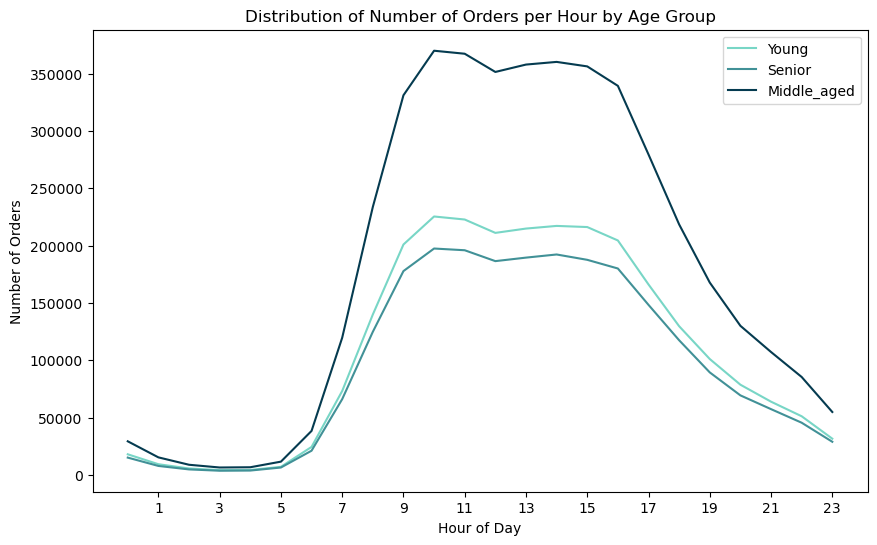

In [48]:
# Reduce the sample to only the columns needed for the chart (using small sample)
ords_prods_small = small[['time_of_order', 'age_flag']]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each line
colors = ['#78D6C6', '#419197', '#053B50', '#176B87']

# Iterate over unique values in 'region' to separate lines by region
for i, order_freq in enumerate(ords_prods_small['age_flag'].unique()):
    subset = ords_prods_small[ords_prods_small['age_flag'] == order_freq]
    
    # Calculate the count of each day for the current loyalty type
    day_counts = subset['time_of_order'].value_counts().sort_index()
    sns.lineplot(data=day_counts, label=order_freq, color=colors[i])

# Set labels and title
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Orders')
ax.set_title('Distribution of Number of Orders per Hour by Age Group')


# Customize x-axis ticks and labels
ax.set_xticks(range(1, 25, 2))  # Start at 1, end at 24, with a step of 2
ax.set_xticklabels([str(i) for i in range(1, 25, 2)])  # Custom labels

# Add a legend
ax.legend(loc='upper right')

# Export visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_orders_time_age.png'))

### Key Question 7f: Top departments (count of orders) by age group

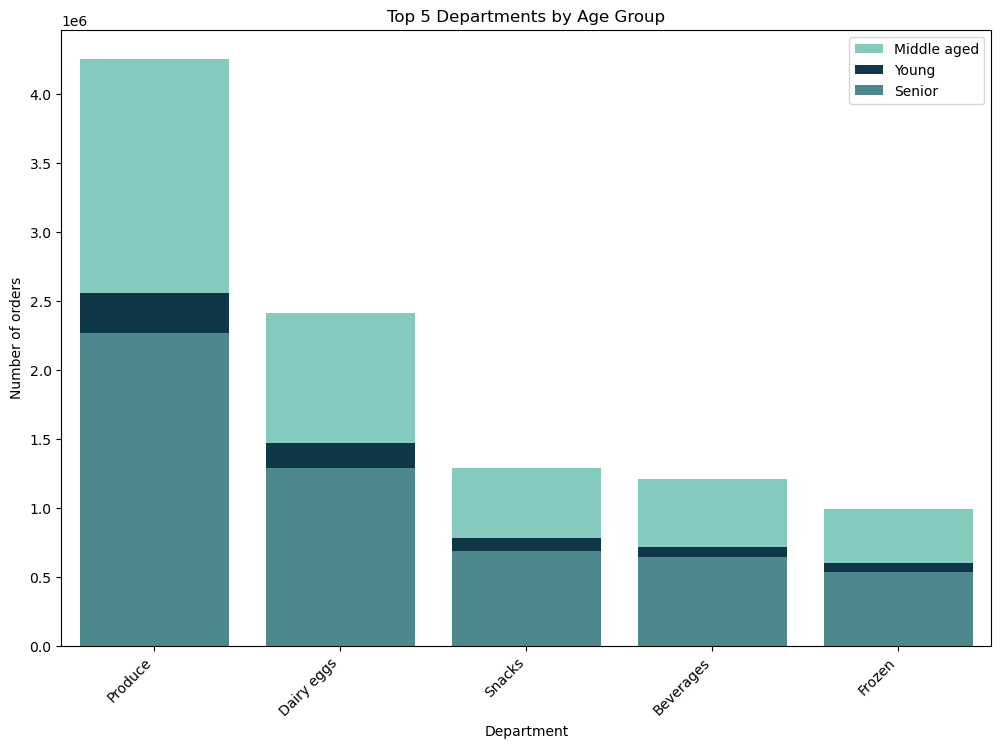

In [3]:
# Filter the data for each region
young = ords_prods_high_act_cust[ords_prods_high_act_cust['age_flag'] == 'Young']
middle_aged = ords_prods_high_act_cust[ords_prods_high_act_cust['age_flag'] == 'Middle aged']
senior = ords_prods_high_act_cust[ords_prods_high_act_cust['age_flag'] == 'Senior']


# Calculate the top 5 departments for each customer type
top_departments_young = young['department'].value_counts().nlargest(5)
top_departments_middle_aged = middle_aged['department'].value_counts().nlargest(5)
top_departments_senior = senior['department'].value_counts().nlargest(5)


# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the top departments for each region
sns.barplot(x=top_departments_middle_aged.index, y=top_departments_middle_aged.values, ax=ax, color='#78D6C6', label='Middle aged')
sns.barplot(x=top_departments_young.index, y=top_departments_young.values, ax=ax, color='#053B50', label='Young')
sns.barplot(x=top_departments_senior.index, y=top_departments_senior.values, ax=ax, color='#419197', label='Senior')


# Set labels and title
ax.set_xlabel('Department')
ax.set_ylabel('Number of orders')
ax.set_title('Top 5 Departments by Age Group')

# Rotate x-axis labels for better readability (optional)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add a legend
ax.legend()

# Export visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_departments_age.png'))


### Key Question 8: What different classifications does the demographic information suggest? 

Age, Income and Family type in '4.10 IC Customer Profiling' scrip


### Key Question 9: What differences can you find in ordering habits of different customer profiles? 
Consider the price of orders, the frequency of orders, the products  customers are ordering, and anything else you can think of.

### Key Question 9a: Distribution of average order price per family demographic

Spending Flag:
- If average price per order < 10, 'Low spender'
- If average price per order >= 10, 'High spender'

Family demographics (age, fam_status, nr_dependants)
- Mature family: >=35, married, >0
- Childless single: -, single|divorced/widowed, 0
- Young family: <35, married, >0
- Descendant with family: -, living with parents and siblings, >0

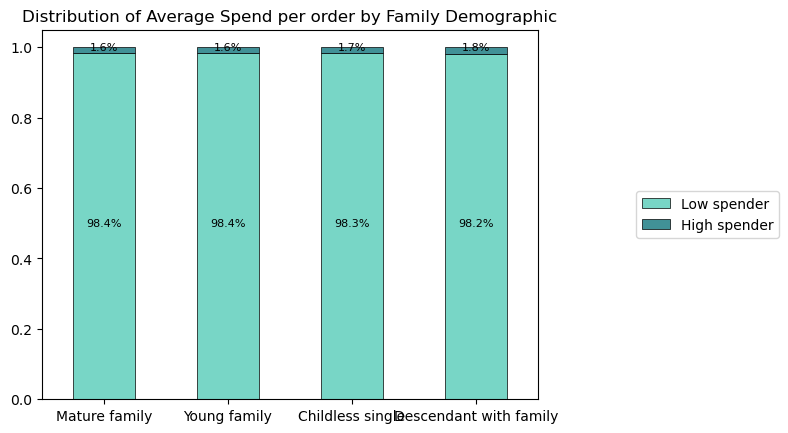

In [16]:
# Group the data by 'spending_flag' and 'age_label' and count occurrences
grouped = ords_prods_high_act_cust.groupby(['fam_demog_flag', 'spending_flag']).size().unstack(fill_value=0)

# Reorder the columns in the chart
order = ['Mature family','Young family', 'Childless single','Descendant with family']
grouped = grouped.loc[order]

# Reorder the slices in the chart
grouped = grouped[['Low spender', 'High spender']]

# Normalize the data to sum up to 100% for each group
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

# Create a grouped bar plot
ax = grouped_normalized.plot(kind='bar', 
                             stacked=True, 
                             color=['#78D6C6','#419197','#053B50'],
                             edgecolor='black', linewidth=0.5)

# Set axis labels and title
plt.xlabel(None)
plt.ylabel(None)
plt.title('Distribution of Average Spend per order by Family Demographic')

# Rotate the label to horizontal
ax.set_xticklabels(grouped_normalized.index, rotation=0)

# Add labels for each bar segment
for bar in ax.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    label = f'{height:.1%}'
    ax.annotate(label, (x + width/2, y + height/2), ha='center', fontsize=8)

# Adjust the position of the legend
plt.legend(loc = 'center right',
          bbox_to_anchor=(1, 0, 0.5, 1))

# Export the plot
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bargrouped_famdemog_spendingflag.png'))

### Key Question 9b: Distribution of average order frequency per family demografic

Order Frequency Flag:
- If median of days since previous order >20, 'Non-frequent customer'
- If median of days since previous order > 10 and <= 20, 'Regular customer'
- If median of days since previous order <=10, 'Frequent customer'


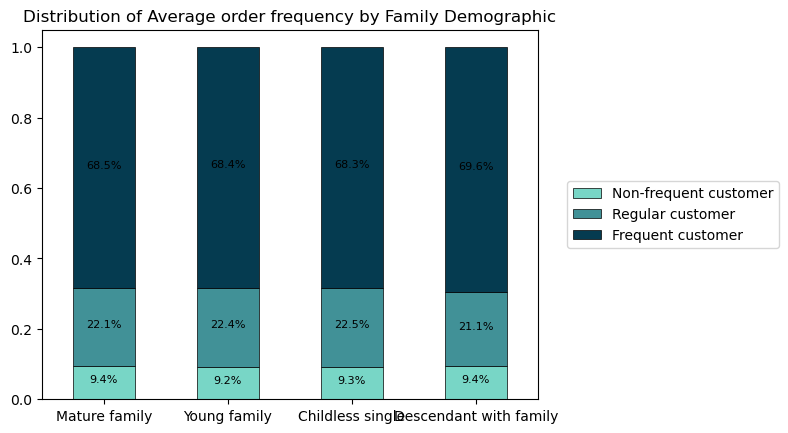

In [18]:
# Group the data by 'order_frequency_flag' and 'age_label' and count occurrences
grouped = ords_prods_high_act_cust.groupby(['fam_demog_flag', 'order_frequency_flag']).size().unstack(fill_value=0)

# Reorder the columns in the chart
order = ['Mature family','Young family', 'Childless single','Descendant with family']
grouped = grouped.loc[order]

# Reorder the slices in the chart
grouped = grouped[['Non-frequent customer', 'Regular customer', 'Frequent customer']]

# Normalize the data to sum up to 100% for each group
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

# Create a grouped bar plot
ax = grouped_normalized.plot(kind='bar', 
                             stacked=True, 
                             color=['#78D6C6','#419197','#053B50'],
                             edgecolor='black', linewidth=0.5)

# Set axis labels and title
plt.xlabel(None)
plt.ylabel(None)
plt.title('Distribution of Average order frequency by Family Demographic')

# Rotate the label to horizontal
ax.set_xticklabels(grouped_normalized.index, rotation=0)

# Add labels for each bar segment
for bar in ax.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    label = f'{height:.1%}'
    ax.annotate(label, (x + width/2, y + height/2), ha='center', fontsize=8)
    
# Adjust the position of the legend
plt.legend(loc = 'center right',
          bbox_to_anchor=(1, 0, 0.5, 1))

# Export the plot
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bargrouped_famdemog_orderfrequency.png'))

### Key Question 9c: Distribution of max nr of orders (loyalty) per family demographic

Loyalty Flag:
- If max order number <=10, 'New customer'
- If max order number >10 and <=40, 'Regular customer'
- If max order > 40, 'Loyal customer'

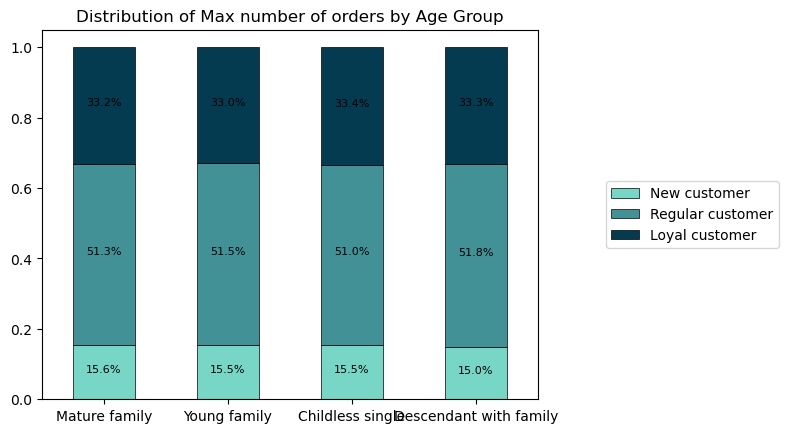

In [20]:
# Group the data by 'loyalty_flag' and 'age_label' and count occurrences
grouped = ords_prods_high_act_cust.groupby(['fam_demog_flag', 'loyalty_flag']).size().unstack(fill_value=0)

# Reorder the columns in the chart
order = ['Mature family','Young family', 'Childless single','Descendant with family']
grouped = grouped.loc[order]

# Reorder the slices in the chart
grouped = grouped[['New customer', 'Regular customer', 'Loyal customer']]

# Normalize the data to sum up to 100% for each group
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

# Create a grouped bar plot
ax = grouped_normalized.plot(kind='bar', 
                             stacked=True, 
                             color=['#78D6C6','#419197','#053B50'],
                             edgecolor='black', linewidth=0.5)

# Set axis labels and title
plt.xlabel(None)
plt.ylabel(None)
plt.title('Distribution of Max number of orders by Age Group')

# Rotate the label to horizontal
ax.set_xticklabels(grouped_normalized.index, rotation=0)

# Add labels for each bar segment
for i, bar in enumerate(ax.patches):
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    label = f'{height:.1%}'
    ax.annotate(label, (x + width/2, y + height/2), ha='center', fontsize=8)
    
    
# Adjust the position of the legend
plt.legend(loc = 'center right',
          bbox_to_anchor=(1, 0, 0.5, 1))

# Export the plot
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bargrouped_famdemog_loyalty.png'))

### Key Question 9d: Distribution of nr of orders by day of week by Family demographic

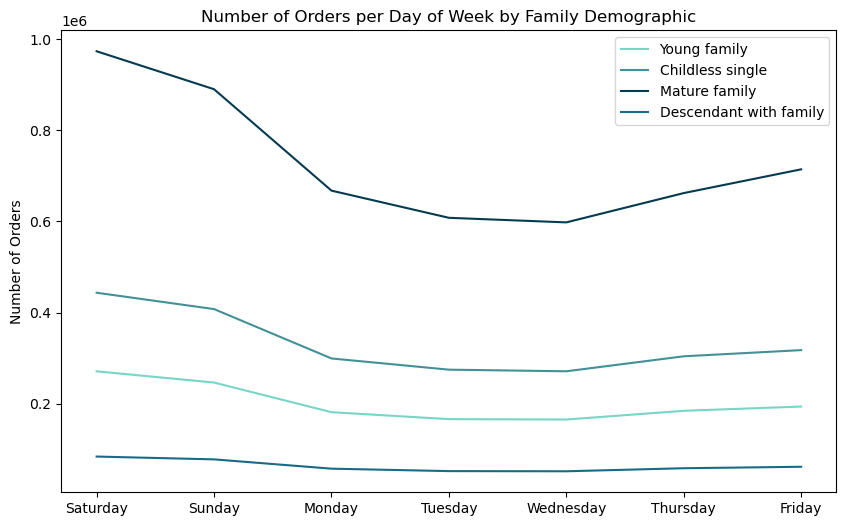

In [23]:
# Reduce the sample to only the columns needed for the chart (using small sample)
ords_prods_small = small[['orders_day_of_week', 'fam_demog_flag']]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each line
colors = ['#78D6C6', '#419197', '#053B50', '#176B87']


# Iterate over unique values in to separate lines by group
for i, order_freq in enumerate(ords_prods_small['fam_demog_flag'].unique()):
    subset = ords_prods_small[ords_prods_small['fam_demog_flag'] == order_freq]
    
    # Calculate the count of each day for the current loyalty type
    day_counts = subset['orders_day_of_week'].value_counts().sort_index()
    sns.lineplot(data=day_counts, label=order_freq, color=colors[i])

# Set labels and title
ax.set_xlabel(None)
ax.set_ylabel('Number of Orders')
ax.set_title('Number of Orders per Day of Week by Family Demographic')

# Update x-axis labels to use day names
ax.set_xticks(list(day_names.keys()))
ax.set_xticklabels(list(day_names.values()), rotation=0)

# Add a legend
ax.legend(loc='upper right')

# Export visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_orders_dow_famdemog.png'))

### Key Question 9e: Distribution of nr of orders by time of day by Family Demographic

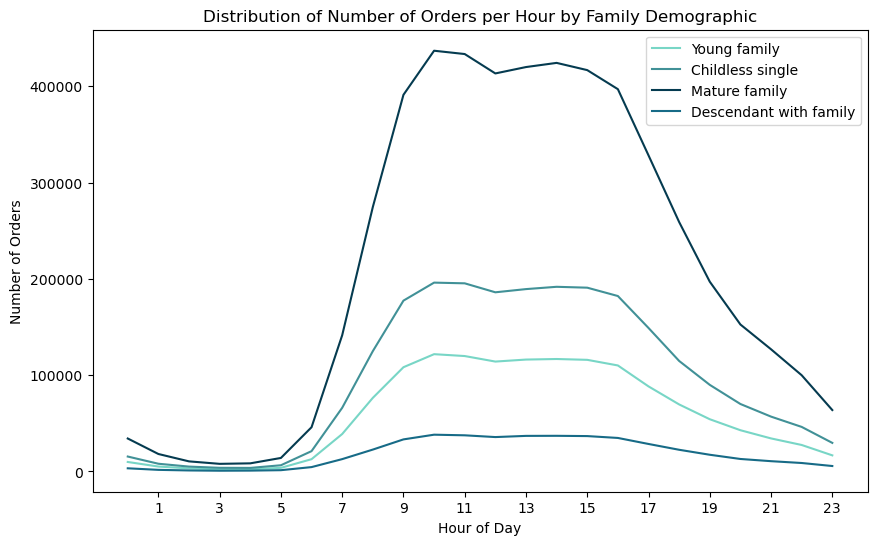

In [24]:
# Reduce the sample to only the columns needed for the chart (using small sample)
ords_prods_small = small[['time_of_order', 'fam_demog_flag']]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each line
colors = ['#78D6C6', '#419197', '#053B50', '#176B87']

# Iterate over unique values in 'region' to separate lines by region
for i, order_freq in enumerate(ords_prods_small['fam_demog_flag'].unique()):
    subset = ords_prods_small[ords_prods_small['fam_demog_flag'] == order_freq]
    
    # Calculate the count of each day for the current loyalty type
    day_counts = subset['time_of_order'].value_counts().sort_index()
    sns.lineplot(data=day_counts, label=order_freq, color=colors[i])

# Set labels and title
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Orders')
ax.set_title('Distribution of Number of Orders per Hour by Family Demographic')


# Customize x-axis ticks and labels
ax.set_xticks(range(1, 25, 2))  # Start at 1, end at 24, with a step of 2
ax.set_xticklabels([str(i) for i in range(1, 25, 2)])  # Custom labels

# Add a legend
ax.legend(loc='upper right')

# Export visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_orders_time_famdemog.png'))

### Key Question 9f: Top departments (count of orders) by Family demographic

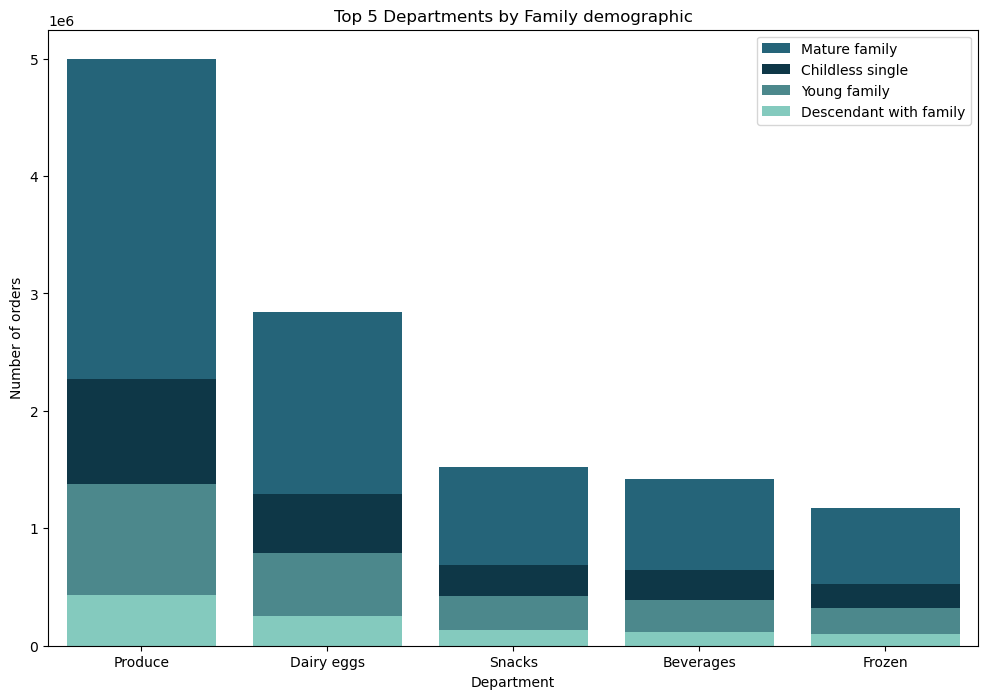

In [34]:
# Filter the data for each region
Mature_family = ords_prods_high_act_cust[ords_prods_high_act_cust['fam_demog_flag'] == 'Mature family']
Young_family = ords_prods_high_act_cust[ords_prods_high_act_cust['fam_demog_flag'] == 'Young family']
Childless_single = ords_prods_high_act_cust[ords_prods_high_act_cust['fam_demog_flag'] == 'Childless single']
Descendant_with_family = ords_prods_high_act_cust[ords_prods_high_act_cust['fam_demog_flag'] == 'Descendant with family']

# Calculate the top 5 departments for each customer type
top_departments_1 = Mature_family['department'].value_counts().nlargest(5)
top_departments_2 = Young_family['department'].value_counts().nlargest(5)
top_departments_3 = Childless_single['department'].value_counts().nlargest(5)
top_departments_4 = Descendant_with_family['department'].value_counts().nlargest(5)

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the top departments for each region
sns.barplot(x=top_departments_1.index, y=top_departments_1.values, ax=ax, color='#176B87', label='Mature family')
sns.barplot(x=top_departments_3.index, y=top_departments_3.values, ax=ax, color='#053B50', label='Childless single')
sns.barplot(x=top_departments_2.index, y=top_departments_2.values, ax=ax, color='#419197', label='Young family')
sns.barplot(x=top_departments_4.index, y=top_departments_4.values, ax=ax, color='#78D6C6', label='Descendant with family')




# Set labels and title
ax.set_xlabel('Department')
ax.set_ylabel('Number of orders')
ax.set_title('Top 5 Departments by Family demographic')

# Add a legend
ax.legend()

# Export visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_departments_famdemog.png'))